In [110]:
# Impport Libraries

import pandas as pd
import seaborn as sns
import matplotlib
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline 
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjust the configuration of the plots we will create

In [111]:
# Import Data from Kaggle
import kaggle 
#!/bin/bash
!kaggle datasets download danielgrijalvas/movies

Dataset URL: https://www.kaggle.com/datasets/danielgrijalvas/movies
License(s): CC0-1.0
movies.zip: Skipping, found more recently modified local copy (use --force to force download)


In [112]:
# Extract the file from the downloading zip file
import zipfile
zipfile_name = "movies.zip"
with zipfile.ZipFile(zipfile_name, 'r') as file:
    file.extractall()

In [113]:
# Let's see the dataset
movies = pd.read_csv("movies.csv")
movies.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [114]:
# Let's see if there is any missing value

for col in movies.columns:
    pct_missing = np.mean(movies[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [115]:
# Data type for our columns
movies.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [116]:
# Create correct year column

movies['yearcorrect'] = movies['released'].str.split().str[2]
movies

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0,2020
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0,2020
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN,2020
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0,2020


In [117]:
# Drop rows with NA
movies = movies.dropna(subset=['budget', 'gross'])

# Change the data type of columns
movies["budget"] = movies["budget"].astype('int64')

movies["gross"] = movies["gross"].astype('int64')

movies


C:\Users\ASUS\AppData\Local\Temp\ipykernel_9836\3803241598.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies["budget"] = movies["budget"].astype('int64')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_9836\3803241598.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies["gross"] = movies["gross"].astype('int64')


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124.0,2020
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99.0,2020
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101.0,2020
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100.0,2020


In [118]:
# Sort Values for Gross column
movies = movies.sort_values(by=['gross'], inplace=False, ascending=False)

In [119]:
# Drop any duplicats

movies.drop_duplicates()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2434,Philadelphia Experiment II,PG-13,Action,1993,"June 4, 1994 (South Korea)",4.5,1900.0,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,97.0,1994
3681,Ginger Snaps,Not Rated,Drama,2000,"May 11, 2001 (Canada)",6.8,43000.0,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108.0,2001
272,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3.9,2300.0,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85.0,1982
2417,Madadayo,NaN,Drama,1993,"April 17, 1993 (Japan)",7.3,5100.0,Akira Kurosawa,Ishirô Honda,Tatsuo Matsumura,Japan,11900000,596,DENTSU Music And Entertainment,134.0,1993


In [ ]:
# # Checking the 
# Budget high correlation
# Company high correlation

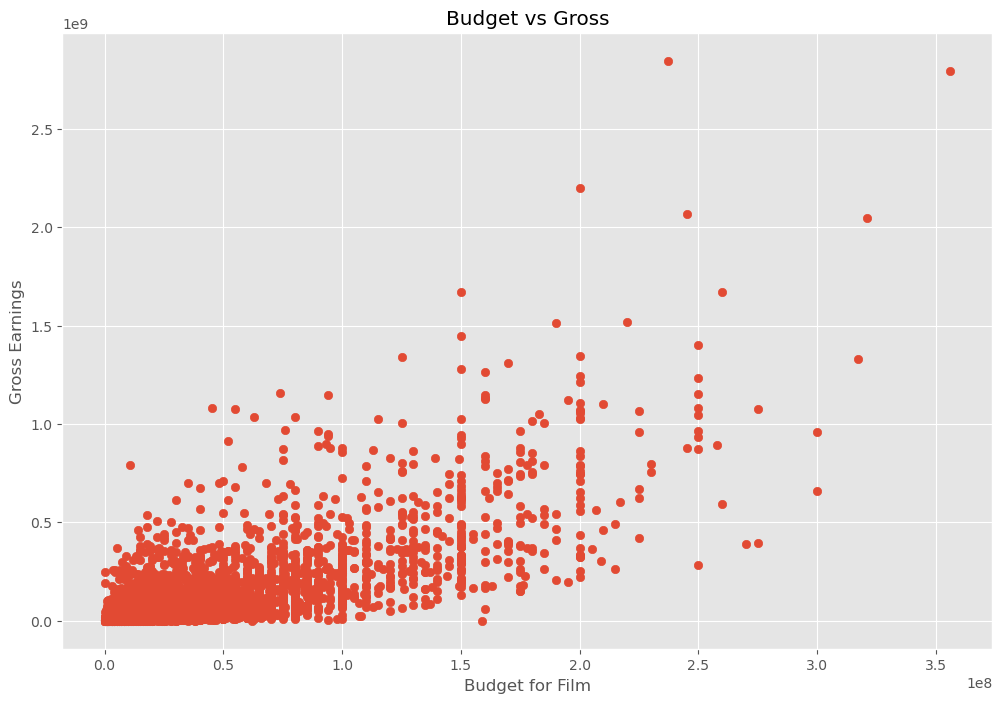

In [121]:
# Scatter plot with budget vs gross

plt.scatter(x=movies['budget'], y=movies['gross'])
plt.title('Budget vs Gross')
plt.xlabel('Budget for Film')
plt.ylabel('Gross Earnings')
plt.show()

In [122]:
movies.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


<Axes: xlabel='budget', ylabel='gross'>

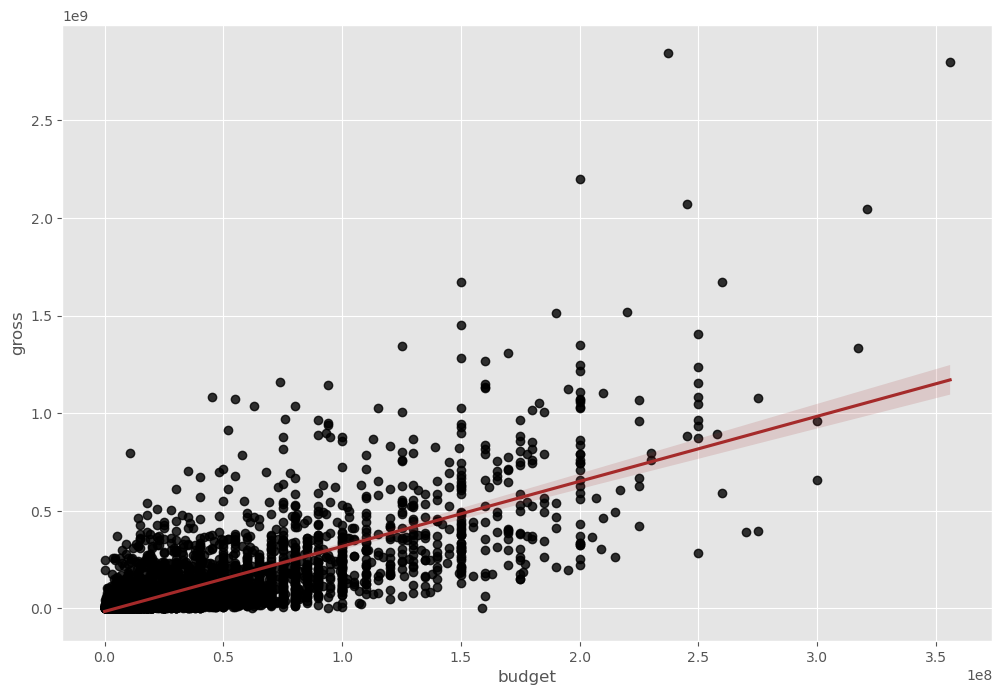

In [123]:
# Plot budget vs gross using seaborn

sns.regplot(x='budget', y='gross', data=movies, scatter_kws={"color":"black"}, line_kws={"color":"brown"})

In [124]:
# Let's start looking at correlation

movies.select_dtypes(include=['number']).corr()

,year,score,votes,budget,gross,runtime
year,1.000000,0.055174,0.205758,0.327781,0.274264,0.074203
score,0.055174,1.000000,0.473809,0.071792,0.222143,0.414580
votes,0.205758,0.473809,1.000000,0.440021,0.614904,0.352437
budget,0.327781,0.071792,0.440021,1.000000,0.740395,0.318595
gross,0.274264,0.222143,0.614904,0.740395,1.000000,0.275596
runtime,0.074203,0.414580,0.352437,0.318595,0.275596,1.000000


In [125]:
# Let's try person correlation
movies.select_dtypes(include=['number']).corr('pearson')

,year,score,votes,budget,gross,runtime
year,1.000000,0.055174,0.205758,0.327781,0.274264,0.074203
score,0.055174,1.000000,0.473809,0.071792,0.222143,0.414580
votes,0.205758,0.473809,1.000000,0.440021,0.614904,0.352437
budget,0.327781,0.071792,0.440021,1.000000,0.740395,0.318595
gross,0.274264,0.222143,0.614904,0.740395,1.000000,0.275596
runtime,0.074203,0.414580,0.352437,0.318595,0.275596,1.000000


In [126]:
# Let's try kendall correlation
movies.select_dtypes(include=['number']).corr('kendall')

,year,score,votes,budget,gross,runtime
year,1.000000,0.038391,0.295884,0.220991,0.239313,0.064106
score,0.038391,1.000000,0.350111,-0.006518,0.124715,0.292872
votes,0.295884,0.350111,1.000000,0.346228,0.553640,0.205616
budget,0.220991,-0.006518,0.346228,1.000000,0.512637,0.230879
gross,0.239313,0.124715,0.553640,0.512637,1.000000,0.176825
runtime,0.064106,0.292872,0.205616,0.230879,0.176825,1.000000


In [127]:
# Let's try spearman correlation
movies.select_dtypes(include=['number']).corr('spearman')

,year,score,votes,budget,gross,runtime
year,1.000000,0.056269,0.426571,0.313199,0.350679,0.094396
score,0.056269,1.000000,0.495379,-0.010133,0.182857,0.413040
votes,0.426571,0.495379,1.000000,0.493404,0.745815,0.300959
budget,0.313199,-0.010133,0.493404,1.000000,0.693670,0.330276
gross,0.350679,0.182857,0.745815,0.693670,1.000000,0.257121
runtime,0.094396,0.413040,0.300959,0.330276,0.257121,1.000000


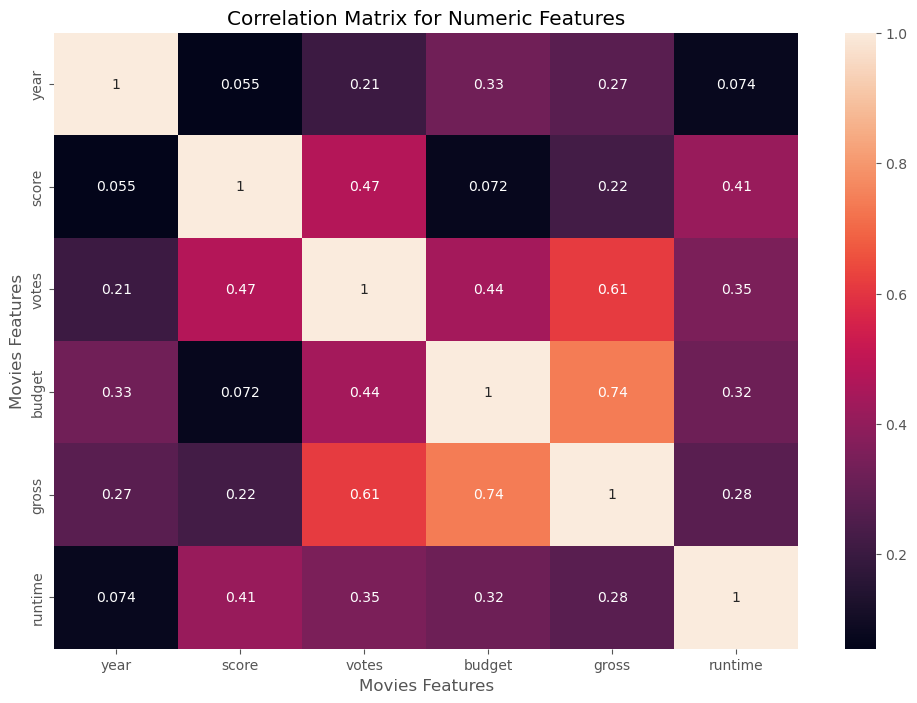

In [128]:
# High correlation between budget and gross
corr_matrix = movies.select_dtypes(include=['number']).corr('pearson')

sns.heatmap(corr_matrix, annot=True)
plt.title("Correlation Matrix for Numeric Features")
plt.xlabel('Movies Features')
plt.ylabel('Movies Features')
plt.show()

In [129]:
# Looks at company
movies['company']

5445             Twentieth Century Fox
7445                    Marvel Studios
3045             Twentieth Century Fox
6663                         Lucasfilm
7244                    Marvel Studios
                     ...              
2434                  Trimark Pictures
3681         Copperheart Entertainment
272                   Embassy Pictures
2417    DENTSU Music And Entertainment
3203                          Daybreak
Name: company, Length: 5436, dtype: object

In [130]:
# Change all of the text rows in numeric values
movies_numerized = movies

for col_name in movies_numerized.columns:
    if (movies_numerized[col_name].dtype == 'object'):
        movies_numerized[col_name] = movies_numerized[col_name].astype('category')
        movies_numerized[col_name] = movies_numerized[col_name].cat.codes

movies_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,387,5,0,2009,528,7.8,1100000.0,787,1265,1538,47,237000000,2847246203,1388,162.0,31
7445,389,5,0,2019,138,8.4,903000.0,106,515,1474,47,356000000,2797501328,987,181.0,41
3045,4923,5,6,1997,535,7.8,1100000.0,787,1265,1076,47,200000000,2201647264,1388,194.0,19
6663,3656,5,0,2015,530,7.8,876000.0,770,1810,357,47,245000000,2069521700,949,138.0,37
7244,390,5,0,2018,146,8.4,897000.0,106,515,1474,47,321000000,2048359754,987,149.0,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2434,2981,5,0,1993,1471,4.5,1900.0,1810,3112,187,47,5000000,2970,1382,97.0,16
3681,1599,3,6,2000,1726,6.8,43000.0,954,1687,528,6,5000000,2554,468,108.0,23
272,2921,6,9,1982,1530,3.9,2300.0,263,55,1477,47,800000,2270,584,85.0,4
2417,2401,-1,6,1993,64,7.3,5100.0,23,1220,1687,26,11900000,596,492,134.0,15


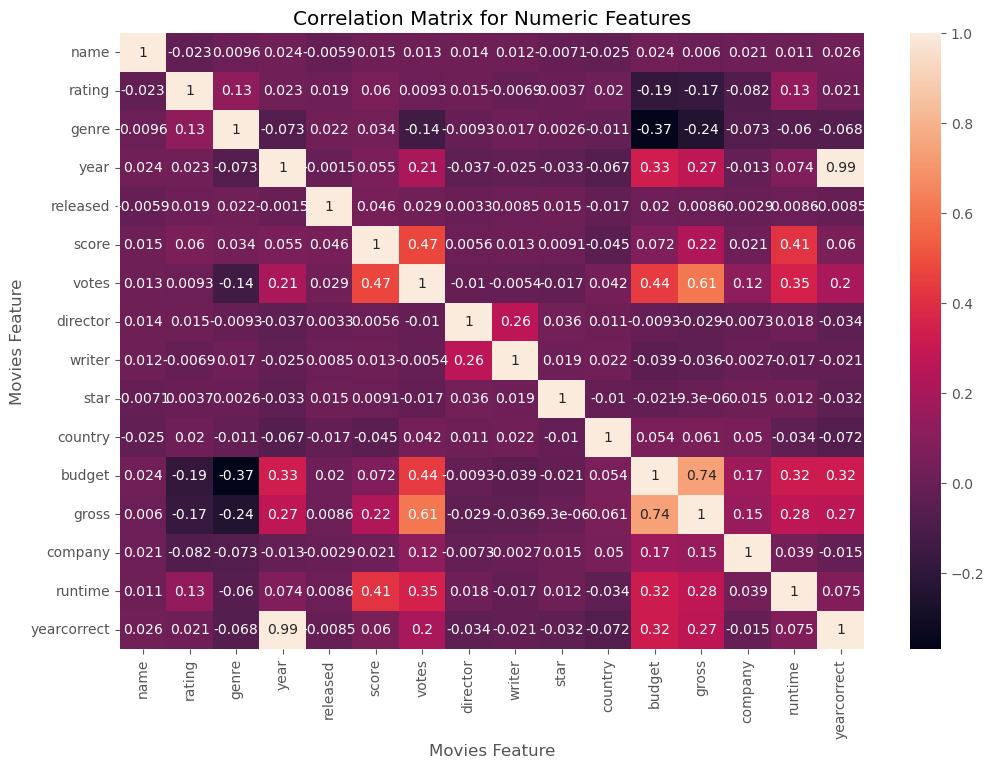

In [131]:
# Second correlation between budget and gross

corr_matrix2 = movies_numerized.corr(method='pearson')
sns.heatmap(corr_matrix2, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movies Feature')
plt.ylabel('Movies Feature')
plt.show()

In [132]:
movies_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
name,1.000000,-0.023013,0.009617,0.024435,-0.005896,0.014955,0.012915,0.013699,0.011602,-0.007109,-0.024555,0.023698,0.005966,0.021209,0.010800,0.025977
rating,-0.023013,1.000000,0.128102,0.022668,0.018836,0.059550,0.009255,0.014847,-0.006923,0.003737,0.020148,-0.186892,-0.168814,-0.082189,0.133239,0.021431
genre,0.009617,0.128102,1.000000,-0.073026,0.021712,0.034061,-0.136457,-0.009303,0.017500,0.002619,-0.010847,-0.368900,-0.244380,-0.073293,-0.060186,-0.067666
year,0.024435,0.022668,-0.073026,1.000000,-0.001481,0.055174,0.205758,-0.036936,-0.024568,-0.032770,-0.066662,0.327781,0.274264,-0.013062,0.074203,0.994746
released,-0.005896,0.018836,0.021712,-0.001481,1.000000,0.046424,0.029029,0.003341,0.008514,0.015363,-0.017231,0.019888,0.008614,-0.002927,0.008619,-0.008452
score,0.014955,0.059550,0.034061,0.055174,0.046424,1.000000,0.473809,0.005573,0.012860,0.009121,-0.044690,0.071792,0.222143,0.021054,0.414580,0.060171
votes,0.012915,0.009255,-0.136457,0.205758,0.029029,0.473809,1.000000,-0.010198,-0.005394,-0.017140,0.042146,0.440021,0.614904,0.119366,0.352437,0.202739
director,0.013699,0.014847,-0.009303,-0.036936,0.003341,0.005573,-0.010198,1.000000,0.262940,0.036289,0.011108,-0.009340,-0.029366,-0.007337,0.018082,-0.034082
writer,0.011602,-0.006923,0.017500,-0.024568,0.008514,0.012860,-0.005394,0.262940,1.000000,0.019273,0.022153,-0.039420,-0.035999,-0.002658,-0.016672,-0.020961
star,-0.007109,0.003737,0.002619,-0.032770,0.015363,0.009121,-0.017140,0.036289,0.019273,1.000000,-0.010135,-0.021282,-0.000009,0.015086,0.012439,-0.032114


In [133]:
corr_matrix3 = movies_numerized.corr()

corr_pairs = corr_matrix3.unstack()

corr_pairs

name         name           1.000000
             rating        -0.023013
             genre          0.009617
             year           0.024435
             released      -0.005896
                              ...   
yearcorrect  budget         0.320147
             gross          0.268273
             company       -0.015181
             runtime        0.075342
             yearcorrect    1.000000
Length: 256, dtype: float64

In [134]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

genre        budget        -0.368900
budget       genre         -0.368900
gross        genre         -0.244380
genre        gross         -0.244380
rating       budget        -0.186892
                              ...   
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
Length: 256, dtype: float64

In [135]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

votes        gross          0.614904
gross        votes          0.614904
             budget         0.740395
budget       gross          0.740395
yearcorrect  year           0.994746
year         yearcorrect    0.994746
name         name           1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64

In [ ]:
# Result
# Vote and budget have the highest correlation to gross earnings 

# Company has low correlaion